# Assignment 1 - Excercise 4

In [4]:
import numpy as np
import matplotlib.pyplot as plt

*Algorithm*

1. Randomly generate a bit sequence $x$.
2. Create a copy of $x$ and invert each of its bits with probability p. Let $x_m$ be the result.
3. If $x_m$ is closer to the goal sequence than $x$ then replace $x$ with $x_m$.
4. Repeat the process from step (b) with the new $x$ until the goal sequence is reached.

The *Counting Ones* problem amounts to find a bit string whose sum of its entries is
maximum. Implement a simple (1 + 1)-GA for solving the Counting Ones problem.


### (a) Use bit strings of length $l = 100$ and a mutation rate $p = \frac{1}{l}$. For a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.

In [1]:
# Bit string length 
l = 100

# Mutation rate
p = 1/l

# Number of iterations
n_iter = 1500

In [37]:
def run(n_iter=1500):
    """ 
    Compute one run of `n_iter` iterations.
    Collect fitnesses for each iteration and whether the optimum
    was found.
    """
    
    # Random initial sequence of length l (assuming uniform distribution)
    x = np.random.choice([True, False], l)

    # Evaluation function that counts number of 'True' occurences
    # (solution has l occurences of 'True')
    def _eval(candidate):
        return np.count_nonzero(candidate==True)

    # Get score of initial sequence
    score = _eval(x)

    fitnesses = []

    for i in range(n_iter):

        # Invert sequence
        invert = np.random.choice([True, False], l, p=[p, 1-p])
        x_m = np.logical_xor(x, invert) # XOR has desired truth table

        # Evaluate x_m
        score_xm = _eval(x_m)

        # Replace x if x_m scores higher
        if score_xm > score:
            x = x_m
            score = score_xm

        # Collect best fitnesses
        fitnesses.append(score)
    
    has_found_solution = True if fitnesses[-1]==l else False
    
    return fitnesses, has_found_solution

fitnesses, _ = run()

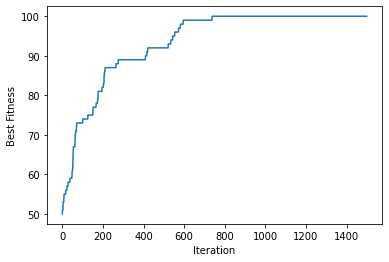

In [38]:
plt.plot(np.arange(n_iter), fitnesses)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.show()

### (b) Now do 10 runs. How many times the algorithm finds the optimum?

In [46]:
def count_solutions(n_runs = 10, verbose = False):
    count = 0
    
    for r_id in range(n_runs):
        if verbose: print('{}/{}\r'.format(r_id+1, n_runs), end='')

        fitnesses, has_found_solution = run()
        if has_found_solution:
            count += 1

    return count
   
n_runs = 10
count = count_solutions(n_runs)
print('The algorithm has found the optimum in {} of {} runs.'.format(count, n_runs))

The algorithm has found the optimum in 9 of 10 runs.


In [57]:
# Count the solutions over 10000 runs to get a more accurate estimate
n_runs = 10000
count = count_solutions(n_runs, verbose=True)
print('The algorithm finds the optimum in {:.0f}% of runs with 1500 iterations each.'.format((count/n_runs)*100))

The algorithm finds the optimum in 90% of runs with 1500 iterations each.


### (c) Now replace (c) in the above algorithm with (c’ ): replace $x$ with $x_m$. Is there a difference in performance when using this modification? Justify your answer.

In [59]:
def run_cprime():
    # Random initial sequence of length l (assuming uniform distribution)
    x = np.random.choice([True, False], l)

    # Evaluation function that counts number of 'True' occurences
    # (solution has l occurences of 'True')
    def _eval(candidate):
        return np.count_nonzero(candidate==True)

    # Get score of initial sequence
    score = _eval(x)

    fitnesses = []

    for i in range(n_iter):

        # Invert sequence
        invert = np.random.choice([True, False], l, p=[p, 1-p])
        
        # Just replace x no matter what
        x = np.logical_xor(x, invert)
        score = _eval(x)

        # Collect fitness
        fitnesses.append(score)
    
    has_found_solution = True if fitnesses[-1]==l else False
    
    return fitnesses, has_found_solution

fitnesses, _ = run_cprime()

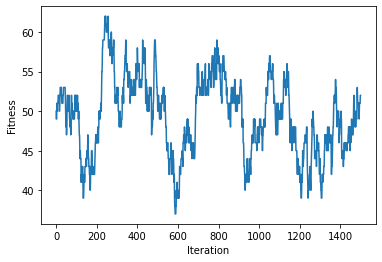

In [64]:
plt.plot(np.arange(n_iter), fitnesses)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

In [66]:
print('Mean fitness of 1500 iterations:', np.mean(fitnesses))

Mean fitness of 1500 iterations: 49.364


In [63]:
def count_solutions(n_runs = 10, verbose = False):
    count = 0
    
    for r_id in range(n_runs):
        if verbose: print('{}/{}\r'.format(r_id+1, n_runs), end='')

        fitnesses, has_found_solution = run_cprime()
        if has_found_solution:
            count += 1

    return count
   
n_runs = 1000
count = count_solutions(n_runs, verbose=True)
print('The algorithm has found the optimum in {} of {} runs.'.format(count, n_runs))

The algorithm has found the optimum in 0 of 1000 runs.


**Answer:** There is an obvious difference in performance in that the new algorithm does not find the optimum at all (for 1000 tested runs, it did not find the optimum once). This makes sense, considering that the algorithm simply replaces $x$ in every iteration, without paying attention to whether the new sequence $x_m$ is better or worse. In the above plot, we can observe this phenomenon: the fitness follows a random pattern without any visible convergence behaviour towards the optimum. Even more so, we can observe that the fitnesses cycle around a mean of 50, which is the expected fitness of the initial sequence. This means that the algorithm is on average creating the same amount of better and worse solutions at each iteration, which shows that it is entirely uninformed about its performance and lacks any possibility of structural improvement. 